In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
import xgboost as xgb
import operator
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
FOLDS = 4
N_JOBS = 6
SEED = 2016

#DATA = "Base"
#DATA = "Time"
DATA = "Medians"
#DATA = "Lags"
#DATA = "SuperNA"


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Get data
train_y1b1 = pd.read_csv("clean_data/train_y1b1_" + DATA + ".csv")
train_y1b2 = pd.read_csv("clean_data/train_y1b2_" + DATA + ".csv")
train_y1b3 = pd.read_csv("clean_data/train_y1b3_" + DATA + ".csv")
train_y1b4 = pd.read_csv("clean_data/train_y1b4_" + DATA + ".csv")

train_y2b1 = pd.read_csv("clean_data/train_y2b1_" + DATA + ".csv")
train_y2b2 = pd.read_csv("clean_data/train_y2b2_" + DATA + ".csv")
train_y2b4 = pd.read_csv("clean_data/train_y2b4_" + DATA + ".csv")

train_y3b3 = pd.read_csv("clean_data/train_y3b3_" + DATA + ".csv")

train_y4b1 = pd.read_csv("clean_data/train_y4b1_" + DATA + ".csv")
train_y4b2 = pd.read_csv("clean_data/train_y4b2_" + DATA + ".csv")
train_y4b4 = pd.read_csv("clean_data/train_y4b4_" + DATA + ".csv")

train_y5b1 = pd.read_csv("clean_data/train_y5b1_" + DATA + ".csv")
train_y5b2 = pd.read_csv("clean_data/train_y5b2_" + DATA + ".csv")
train_y5b3 = pd.read_csv("clean_data/train_y5b3_" + DATA + ".csv")
train_y5b4 = pd.read_csv("clean_data/train_y5b4_" + DATA + ".csv")
###
X_train_y1b1 = pd.read_csv("clean_data/X_train_y1b1_" + DATA + ".csv")
X_train_y1b2 = pd.read_csv("clean_data/X_train_y1b2_" + DATA + ".csv")
X_train_y1b3 = pd.read_csv("clean_data/X_train_y1b3_" + DATA + ".csv")
X_train_y1b4 = pd.read_csv("clean_data/X_train_y1b4_" + DATA + ".csv")

X_train_y2b1 = pd.read_csv("clean_data/X_train_y2b1_" + DATA + ".csv")
X_train_y2b2 = pd.read_csv("clean_data/X_train_y2b2_" + DATA + ".csv")
X_train_y2b4 = pd.read_csv("clean_data/X_train_y2b4_" + DATA + ".csv")

X_train_y3b3 = pd.read_csv("clean_data/X_train_y3b3_" + DATA + ".csv")

X_train_y4b1 = pd.read_csv("clean_data/X_train_y4b1_" + DATA + ".csv")
X_train_y4b2 = pd.read_csv("clean_data/X_train_y4b2_" + DATA + ".csv")
X_train_y4b4 = pd.read_csv("clean_data/X_train_y4b4_" + DATA + ".csv")

X_train_y5b1 = pd.read_csv("clean_data/X_train_y5b1_" + DATA + ".csv")
X_train_y5b2 = pd.read_csv("clean_data/X_train_y5b2_" + DATA + ".csv")
X_train_y5b3 = pd.read_csv("clean_data/X_train_y5b3_" + DATA + ".csv")
X_train_y5b4 = pd.read_csv("clean_data/X_train_y5b4_" + DATA + ".csv")
###
X_trainVal_y1b1 = pd.read_csv("clean_data/X_trainVal_y1b1_" + DATA + ".csv")
X_trainVal_y1b2 = pd.read_csv("clean_data/X_trainVal_y1b2_" + DATA + ".csv")
X_trainVal_y1b3 = pd.read_csv("clean_data/X_trainVal_y1b3_" + DATA + ".csv")
X_trainVal_y1b4 = pd.read_csv("clean_data/X_trainVal_y1b4_" + DATA + ".csv")

X_trainVal_y2b1 = pd.read_csv("clean_data/X_trainVal_y2b1_" + DATA + ".csv")
X_trainVal_y2b2 = pd.read_csv("clean_data/X_trainVal_y2b2_" + DATA + ".csv")
X_trainVal_y2b4 = pd.read_csv("clean_data/X_trainVal_y2b4_" + DATA + ".csv")

X_trainVal_y3b3 = pd.read_csv("clean_data/X_trainVal_y3b3_" + DATA + ".csv")

X_trainVal_y4b1 = pd.read_csv("clean_data/X_trainVal_y4b1_" + DATA + ".csv")
X_trainVal_y4b2 = pd.read_csv("clean_data/X_trainVal_y4b2_" + DATA + ".csv")
X_trainVal_y4b4 = pd.read_csv("clean_data/X_trainVal_y4b4_" + DATA + ".csv")

X_trainVal_y5b1 = pd.read_csv("clean_data/X_trainVal_y5b1_" + DATA + ".csv")
X_trainVal_y5b2 = pd.read_csv("clean_data/X_trainVal_y5b2_" + DATA + ".csv")
X_trainVal_y5b3 = pd.read_csv("clean_data/X_trainVal_y5b3_" + DATA + ".csv")
X_trainVal_y5b4 = pd.read_csv("clean_data/X_trainVal_y5b4_" + DATA + ".csv")
###
'''test = pd.read_csv("clean_data/test_" + DATA + ".csv")'''
test_y1b1 = pd.read_csv("clean_data/test_y1b1_" + DATA + ".csv")
test_y1b2 = pd.read_csv("clean_data/test_y1b2_" + DATA + ".csv")
test_y1b3 = pd.read_csv("clean_data/test_y1b3_" + DATA + ".csv")
test_y1b4 = pd.read_csv("clean_data/test_y1b4_" + DATA + ".csv")

test_y2b1 = pd.read_csv("clean_data/test_y2b1_" + DATA + ".csv")
test_y2b2 = pd.read_csv("clean_data/test_y2b2_" + DATA + ".csv")
test_y2b4 = pd.read_csv("clean_data/test_y2b4_" + DATA + ".csv")

test_y3b3 = pd.read_csv("clean_data/test_y3b3_" + DATA + ".csv")

test_y4b1 = pd.read_csv("clean_data/test_y4b1_" + DATA + ".csv")
test_y4b2 = pd.read_csv("clean_data/test_y4b2_" + DATA + ".csv")
test_y4b4 = pd.read_csv("clean_data/test_y4b4_" + DATA + ".csv")

test_y5b1 = pd.read_csv("clean_data/test_y5b1_" + DATA + ".csv")
test_y5b2 = pd.read_csv("clean_data/test_y5b2_" + DATA + ".csv")
test_y5b3 = pd.read_csv("clean_data/test_y5b3_" + DATA + ".csv")
test_y5b4 = pd.read_csv("clean_data/test_y5b4_" + DATA + ".csv")
###
X_test_y1b1 = pd.read_csv("clean_data/X_test_y1b1_" + DATA + ".csv")
X_test_y1b2 = pd.read_csv("clean_data/X_test_y1b2_" + DATA + ".csv")
X_test_y1b3 = pd.read_csv("clean_data/X_test_y1b3_" + DATA + ".csv")
X_test_y1b4 = pd.read_csv("clean_data/X_test_y1b4_" + DATA + ".csv")

X_test_y2b1 = pd.read_csv("clean_data/X_test_y2b1_" + DATA + ".csv")
X_test_y2b2 = pd.read_csv("clean_data/X_test_y2b2_" + DATA + ".csv")
X_test_y2b4 = pd.read_csv("clean_data/X_test_y2b4_" + DATA + ".csv")

X_test_y3b3 = pd.read_csv("clean_data/X_test_y3b3_" + DATA + ".csv")

X_test_y4b1 = pd.read_csv("clean_data/X_test_y4b1_" + DATA + ".csv")
X_test_y4b2 = pd.read_csv("clean_data/X_test_y4b2_" + DATA + ".csv")
X_test_y4b4 = pd.read_csv("clean_data/X_test_y4b4_" + DATA + ".csv")

X_test_y5b1 = pd.read_csv("clean_data/X_test_y5b1_" + DATA + ".csv")
X_test_y5b2 = pd.read_csv("clean_data/X_test_y5b2_" + DATA + ".csv")
X_test_y5b3 = pd.read_csv("clean_data/X_test_y5b3_" + DATA + ".csv")
X_test_y5b4 = pd.read_csv("clean_data/X_test_y5b4_" + DATA + ".csv")
###
X_testVal_y1b1 = pd.read_csv("clean_data/X_testVal_y1b1_" + DATA + ".csv")
X_testVal_y1b2 = pd.read_csv("clean_data/X_testVal_y1b2_" + DATA + ".csv")
X_testVal_y1b3 = pd.read_csv("clean_data/X_testVal_y1b3_" + DATA + ".csv")
X_testVal_y1b4 = pd.read_csv("clean_data/X_testVal_y1b4_" + DATA + ".csv")

X_testVal_y2b1 = pd.read_csv("clean_data/X_testVal_y2b1_" + DATA + ".csv")
X_testVal_y2b2 = pd.read_csv("clean_data/X_testVal_y2b2_" + DATA + ".csv")
X_testVal_y2b4 = pd.read_csv("clean_data/X_testVal_y2b4_" + DATA + ".csv")

X_testVal_y3b3 = pd.read_csv("clean_data/X_testVal_y3b3_" + DATA + ".csv")

X_testVal_y4b1 = pd.read_csv("clean_data/X_testVal_y4b1_" + DATA + ".csv")
X_testVal_y4b2 = pd.read_csv("clean_data/X_testVal_y4b2_" + DATA + ".csv")
X_testVal_y4b4 = pd.read_csv("clean_data/X_testVal_y4b4_" + DATA + ".csv")

X_testVal_y5b1 = pd.read_csv("clean_data/X_testVal_y5b1_" + DATA + ".csv")
X_testVal_y5b2 = pd.read_csv("clean_data/X_testVal_y5b2_" + DATA + ".csv")
X_testVal_y5b3 = pd.read_csv("clean_data/X_testVal_y5b3_" + DATA + ".csv")
X_testVal_y5b4 = pd.read_csv("clean_data/X_testVal_y5b4_" + DATA + ".csv")
###
y_y1b1 = pd.read_csv("clean_data/y_y1b1.csv")
y_y1b2 = pd.read_csv("clean_data/y_y1b2.csv")
y_y1b3 = pd.read_csv("clean_data/y_y1b3.csv")
y_y1b4 = pd.read_csv("clean_data/y_y1b4.csv")

y_y2b1 = pd.read_csv("clean_data/y_y2b1.csv")
y_y2b2 = pd.read_csv("clean_data/y_y2b2.csv")
y_y2b4 = pd.read_csv("clean_data/y_y2b4.csv")

y_y3b3 = pd.read_csv("clean_data/y_y3b3.csv")

y_y4b1 = pd.read_csv("clean_data/y_y4b1.csv")
y_y4b2 = pd.read_csv("clean_data/y_y4b2.csv")
y_y4b4 = pd.read_csv("clean_data/y_y4b4.csv")

y_y5b1 = pd.read_csv("clean_data/y_y5b1.csv")
y_y5b2 = pd.read_csv("clean_data/y_y5b2.csv")
y_y5b3 = pd.read_csv("clean_data/y_y5b3.csv")
y_y5b4 = pd.read_csv("clean_data/y_y5b4.csv")
###
y_train_y1b1 = pd.read_csv("clean_data/y_train_y1b1.csv")
y_train_y1b2 = pd.read_csv("clean_data/y_train_y1b2.csv")
y_train_y1b3 = pd.read_csv("clean_data/y_train_y1b3.csv")
y_train_y1b4 = pd.read_csv("clean_data/y_train_y1b4.csv")

y_train_y2b1 = pd.read_csv("clean_data/y_train_y2b1.csv")
y_train_y2b2 = pd.read_csv("clean_data/y_train_y2b2.csv")
y_train_y2b4 = pd.read_csv("clean_data/y_train_y2b4.csv")

y_train_y3b3 = pd.read_csv("clean_data/y_train_y3b3.csv")

y_train_y4b1 = pd.read_csv("clean_data/y_train_y4b1.csv")
y_train_y4b2 = pd.read_csv("clean_data/y_train_y4b2.csv")
y_train_y4b4 = pd.read_csv("clean_data/y_train_y4b4.csv")

y_train_y5b1 = pd.read_csv("clean_data/y_train_y5b1.csv")
y_train_y5b2 = pd.read_csv("clean_data/y_train_y5b2.csv")
y_train_y5b3 = pd.read_csv("clean_data/y_train_y5b3.csv")
y_train_y5b4 = pd.read_csv("clean_data/y_train_y5b4.csv")
###
y_trainVal_y1b1 = pd.read_csv("clean_data/y_trainVal_y1b1.csv")
y_trainVal_y1b2 = pd.read_csv("clean_data/y_trainVal_y1b2.csv")
y_trainVal_y1b3 = pd.read_csv("clean_data/y_trainVal_y1b3.csv")
y_trainVal_y1b4 = pd.read_csv("clean_data/y_trainVal_y1b4.csv")

y_trainVal_y2b1 = pd.read_csv("clean_data/y_trainVal_y2b1.csv")
y_trainVal_y2b2 = pd.read_csv("clean_data/y_trainVal_y2b2.csv")
y_trainVal_y2b4 = pd.read_csv("clean_data/y_trainVal_y2b4.csv")

y_trainVal_y3b3 = pd.read_csv("clean_data/y_trainVal_y3b3.csv")

y_trainVal_y4b1 = pd.read_csv("clean_data/y_trainVal_y4b1.csv")
y_trainVal_y4b2 = pd.read_csv("clean_data/y_trainVal_y4b2.csv")
y_trainVal_y4b4 = pd.read_csv("clean_data/y_trainVal_y4b4.csv")

y_trainVal_y5b1 = pd.read_csv("clean_data/y_trainVal_y5b1.csv")
y_trainVal_y5b2 = pd.read_csv("clean_data/y_trainVal_y5b2.csv")
y_trainVal_y5b3 = pd.read_csv("clean_data/y_trainVal_y5b3.csv")
y_trainVal_y5b4 = pd.read_csv("clean_data/y_trainVal_y5b4.csv")
###
y_test_y1b1 = pd.read_csv("clean_data/y_test_y1b1.csv")
y_test_y1b2 = pd.read_csv("clean_data/y_test_y1b2.csv")
y_test_y1b3 = pd.read_csv("clean_data/y_test_y1b3.csv")
y_test_y1b4 = pd.read_csv("clean_data/y_test_y1b4.csv")

y_test_y2b1 = pd.read_csv("clean_data/y_test_y2b1.csv")
y_test_y2b2 = pd.read_csv("clean_data/y_test_y2b2.csv")
y_test_y2b4 = pd.read_csv("clean_data/y_test_y2b4.csv")

y_test_y3b3 = pd.read_csv("clean_data/y_test_y3b3.csv")

y_test_y4b1 = pd.read_csv("clean_data/y_test_y4b1.csv")
y_test_y4b2 = pd.read_csv("clean_data/y_test_y4b2.csv")
y_test_y4b4 = pd.read_csv("clean_data/y_test_y4b4.csv")

y_test_y5b1 = pd.read_csv("clean_data/y_test_y5b1.csv")
y_test_y5b2 = pd.read_csv("clean_data/y_test_y5b2.csv")
y_test_y5b3 = pd.read_csv("clean_data/y_test_y5b3.csv")
y_test_y5b4 = pd.read_csv("clean_data/y_test_y5b4.csv")
###
y_testVal_y1b1 = pd.read_csv("clean_data/y_testVal_y1b1.csv")
y_testVal_y1b2 = pd.read_csv("clean_data/y_testVal_y1b2.csv")
y_testVal_y1b3 = pd.read_csv("clean_data/y_testVal_y1b3.csv")
y_testVal_y1b4 = pd.read_csv("clean_data/y_testVal_y1b4.csv")

y_testVal_y2b1 = pd.read_csv("clean_data/y_testVal_y2b1.csv")
y_testVal_y2b2 = pd.read_csv("clean_data/y_testVal_y2b2.csv")
y_testVal_y2b4 = pd.read_csv("clean_data/y_testVal_y2b4.csv")

y_testVal_y3b3 = pd.read_csv("clean_data/y_testVal_y3b3.csv")

y_testVal_y4b1 = pd.read_csv("clean_data/y_testVal_y4b1.csv")
y_testVal_y4b2 = pd.read_csv("clean_data/y_testVal_y4b2.csv")
y_testVal_y4b4 = pd.read_csv("clean_data/y_testVal_y4b4.csv")

y_testVal_y5b1 = pd.read_csv("clean_data/y_testVal_y5b1.csv")
y_testVal_y5b2 = pd.read_csv("clean_data/y_testVal_y5b2.csv")
y_testVal_y5b3 = pd.read_csv("clean_data/y_testVal_y5b3.csv")
y_testVal_y5b4 = pd.read_csv("clean_data/y_testVal_y5b4.csv")

In [3]:
# Definitions for XGBoost

xg_params = {
    "booster" : "gbtree", 
    "eta" : 0.001,
    "max_depth" : 5,
    "min_child_weight" : 6,
    "subsample" : 0.98,
    "colsample_bytree" : 0.8,
    "colsample_bylevel" : 0.85,
    "gamma" : 0.06,
    "base_score" : 0.65,
    "objective" : "reg:linear",
}

def xgb_mse(preds, dtrain) :
    labels = dtrain.get_label()
    return ("mse", mean_squared_error(preds, labels))

def run_xgb(X_trainVal, y_trainVal, X_testVal, y_testVal, X_train, y_train) :
    xg_trainVal = xgb.DMatrix(X_trainVal, label = y_trainVal)
    xg_testVal = xgb.DMatrix(X_testVal, label = y_testVal)
    xg_train = xgb.DMatrix(X_train, label = y_train)
    
    watchlist = [(xg_trainVal, "train"), (xg_testVal, "eval")]    
    
    # Train model
    xg = xgb.train(
        params = xg_params,
        dtrain = xg_trainVal,
        evals = watchlist, 
        num_boost_round = 100000,
        feval = xgb_mse, 
        maximize = False,
        early_stopping_rounds = 100,
        verbose_eval = False)
    
    print("XGBOOST best_iteration " + str(xg.best_iteration))
    print("XGBOOST best_score " + str(xg.best_score))
    
    xg = xgb.train(
        params = xg_params, 
        dtrain = xg_train, 
        num_boost_round = int(xg.best_ntree_limit / 0.67),
        feval = xgb_mse, 
        maximize = False,
        verbose_eval = False)

    return (xg_testVal, xg)

In [4]:
# Generate y_test predictions to be able to optimize ensemble weights
xg_test_y1b1 = xgb.DMatrix(X_test_y1b1)
xg_test_y1b2 = xgb.DMatrix(X_test_y1b2)
xg_test_y1b3 = xgb.DMatrix(X_test_y1b3)
xg_test_y1b4 = xgb.DMatrix(X_test_y1b4)

xg_test_y2b1 = xgb.DMatrix(X_test_y2b1)
xg_test_y2b2 = xgb.DMatrix(X_test_y2b2)
xg_test_y2b4 = xgb.DMatrix(X_test_y2b4)

xg_test_y3b3 = xgb.DMatrix(X_test_y3b3)

xg_test_y4b1 = xgb.DMatrix(X_test_y4b1)
xg_test_y4b2 = xgb.DMatrix(X_test_y4b2)
xg_test_y4b4 = xgb.DMatrix(X_test_y4b4)

xg_test_y5b1 = xgb.DMatrix(X_test_y5b1)
xg_test_y5b2 = xgb.DMatrix(X_test_y5b2)
xg_test_y5b3 = xgb.DMatrix(X_test_y5b3)
xg_test_y5b4 = xgb.DMatrix(X_test_y5b4)

print("y1 : ")  
xg_val, xg = run_xgb(X_trainVal_y1b1, y_trainVal_y1b1.y1, X_testVal_y1b1, y_testVal_y1b1.y1, X_train_y1b1, y_train_y1b1.y1)
#preds_y_val_y1b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y1b1 = xg.predict(xg_test_y1b1) 

xg_val, xg = run_xgb(X_trainVal_y1b2, y_trainVal_y1b2.y1, X_testVal_y1b2, y_testVal_y1b2.y1, X_train_y1b2, y_train_y1b2.y1)
#preds_y_val_y1b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y1b2 = xg.predict(xg_test_y1b2)

xg_val, xg = run_xgb(X_trainVal_y1b3, y_trainVal_y1b3.y1, X_testVal_y1b3, y_testVal_y1b3.y1, X_train_y1b3, y_train_y1b3.y1)
#preds_y_val_y1b3 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y1b3 = xg.predict(xg_test_y1b3) 

xg_val, xg = run_xgb(X_trainVal_y1b4, y_trainVal_y1b4.y1, X_testVal_y1b4, y_testVal_y1b4.y1, X_train_y1b4, y_train_y1b4.y1)
#preds_y_val_y1b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y1b4 = xg.predict(xg_test_y1b4)    
print("-----")

print("y2 : ")    
xg_val, xg = run_xgb(X_trainVal_y2b1, y_trainVal_y2b1.y2, X_testVal_y2b1, y_testVal_y2b1.y2, X_train_y2b1, y_train_y2b1.y2)
#preds_y_val_y2b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y2b1 = xg.predict(xg_test_y2b1) 

xg_val, xg = run_xgb(X_trainVal_y2b2, y_trainVal_y2b2.y2, X_testVal_y2b2, y_testVal_y2b2.y2, X_train_y2b2, y_train_y2b2.y2)
#preds_y_val_y2b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y2b2 = xg.predict(xg_test_y2b2)

xg_val, xg = run_xgb(X_trainVal_y2b4, y_trainVal_y2b4.y2, X_testVal_y2b4, y_testVal_y2b4.y2, X_train_y2b4, y_train_y2b4.y2)
#preds_y_val_y2b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y2b4 = xg.predict(xg_test_y2b4)    
print("-----")
    
print("y3 : ")    
xg_val, xg = run_xgb(X_trainVal_y3b3, y_trainVal_y3b3.y3, X_testVal_y3b3, y_testVal_y3b3.y3, X_train_y3b3, y_train_y3b3.y3)
#preds_y_val_y3b3 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y3b3 = xg.predict(xg_test_y3b3) 
print("-----")
    
print("y4 : ")    
xg_val, xg = run_xgb(X_trainVal_y4b1, y_trainVal_y4b1.y4, X_testVal_y4b1, y_testVal_y4b1.y4, X_train_y4b1, y_train_y4b1.y4)
#preds_y_val_y4b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y4b1 = xg.predict(xg_test_y4b1) 

xg_val, xg = run_xgb(X_trainVal_y4b2, y_trainVal_y4b2.y4, X_testVal_y4b2, y_testVal_y4b2.y4, X_train_y4b2, y_train_y4b2.y4)
#preds_y_val_y4b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y4b2 = xg.predict(xg_test_y4b2)

xg_val, xg = run_xgb(X_trainVal_y4b4, y_trainVal_y4b4.y4, X_testVal_y4b4, y_testVal_y4b4.y4, X_train_y4b4, y_train_y4b4.y4)
#preds_y_val_y4b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y4b4 = xg.predict(xg_test_y4b4)    
print("-----")
    
print("y5 : ")    
xg_val, xg = run_xgb(X_trainVal_y5b1, y_trainVal_y5b1.y5, X_testVal_y5b1, y_testVal_y5b1.y5, X_train_y5b1, y_train_y5b1.y5)
#preds_y_val_y5b1 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y5b1 = xg.predict(xg_test_y5b1) 

xg_val, xg = run_xgb(X_trainVal_y5b2, y_trainVal_y5b2.y5, X_testVal_y5b2, y_testVal_y5b2.y5, X_train_y5b2, y_train_y5b2.y5)
#preds_y_val_y5b2 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y5b2 = xg.predict(xg_test_y5b2)

xg_val, xg = run_xgb(X_trainVal_y5b3, y_trainVal_y5b3.y5, X_testVal_y5b3, y_testVal_y5b3.y5, X_train_y5b3, y_train_y5b3.y5)
#preds_y_val_y5b3 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y5b3 = xg.predict(xg_test_y5b3) 

xg_val, xg = run_xgb(X_trainVal_y5b4, y_trainVal_y5b4.y5, X_testVal_y5b4, y_testVal_y5b4.y5, X_train_y5b4, y_train_y5b4.y5)
#preds_y_val_y5b4 = xg.predict(xg_val, ntree_limit = xg.best_ntree_limit)
preds_y_test_y5b4 = xg.predict(xg_test_y5b4)    
print("-----")


y1 : 
XGBOOST best_iteration 2992
XGBOOST best_score 747.417664
XGBOOST best_iteration 2862
XGBOOST best_score 472.615356
XGBOOST best_iteration 717
XGBOOST best_score 63022.828125
XGBOOST best_iteration 5513
XGBOOST best_score 241.815353
-----
y2 : 
XGBOOST best_iteration 502
XGBOOST best_score 37.616726
XGBOOST best_iteration 2569
XGBOOST best_score 1391.279419
XGBOOST best_iteration 4199
XGBOOST best_score 1950.628174
-----
y3 : 
XGBOOST best_iteration 7978
XGBOOST best_score 244.961365
-----
y4 : 
XGBOOST best_iteration 1614
XGBOOST best_score 3139.571045
XGBOOST best_iteration 1
XGBOOST best_score 0.420819
XGBOOST best_iteration 4546
XGBOOST best_score 2236.301514
-----
y5 : 
XGBOOST best_iteration 3804
XGBOOST best_score 2688.404541
XGBOOST best_iteration 1864
XGBOOST best_score 3867.199951
XGBOOST best_iteration 3769
XGBOOST best_score 3571.861328
XGBOOST best_iteration 3409
XGBOOST best_score 604.813599
-----


In [5]:
# Correct predictions for special outputs
preds_y_test_y2b3 = np.zeros(preds_y_test_y1b3.shape[0])
preds_y_test_y3b1 = np.zeros(preds_y_test_y1b1.shape[0])
preds_y_test_y3b2 = np.zeros(preds_y_test_y1b2.shape[0])
preds_y_test_y3b4 = np.zeros(preds_y_test_y1b4.shape[0])
preds_y_test_y4b3 = np.zeros(preds_y_test_y1b3.shape[0])

'''preds_y_test_y1b3 = np.zeros(preds_y_test_y1b3.shape[0])
preds_y_test_y2b1 = np.zeros(preds_y_test_y1b1.shape[0])
preds_y_test_y4b2 = np.zeros(preds_y_test_y4b2.shape[0])'''

# Concat preds in right format
preds_y_test1 = np.hstack((preds_y_test_y1b1, preds_y_test_y1b2, preds_y_test_y1b3, preds_y_test_y1b4))
preds_y_test2 = np.hstack((preds_y_test_y2b1, preds_y_test_y2b2, preds_y_test_y2b3, preds_y_test_y2b4))
preds_y_test3 = np.hstack((preds_y_test_y3b1, preds_y_test_y3b2, preds_y_test_y3b3, preds_y_test_y3b4))
preds_y_test4 = np.hstack((preds_y_test_y4b1, preds_y_test_y4b2, preds_y_test_y4b3, preds_y_test_y4b4))
preds_y_test5 = np.hstack((preds_y_test_y5b1, preds_y_test_y5b2, preds_y_test_y5b3, preds_y_test_y5b4))

# Correct predictions for near-zero outputs
preds_y_test1[preds_y_test1 < 2] = 0
preds_y_test2[preds_y_test2 < 2] = 0
preds_y_test3[preds_y_test3 < 2] = 0
preds_y_test4[preds_y_test4 < 2] = 0
preds_y_test5[preds_y_test5 < 2] = 0

In [6]:
# Show MSE on y_train using KFold CV
#print("Average XGB MSE using OOF predictions for y1 : " + str(mean_squared_error(y_train1.y1, preds_y_train1)))
#print("Average XGB MSE using OOF predictions for y2 : " + str(mean_squared_error(y_train2.y2, preds_y_train2)))
#print("Average XGB MSE using OOF predictions for y3 : " + str(mean_squared_error(y_train3.y3, preds_y_train3)))
#print("Average XGB MSE using OOF predictions for y4 : " + str(mean_squared_error(y_train4.y4, preds_y_train4)))
#print("Average XGB MSE using OOF predictions for y5 : " + str(mean_squared_error(y_train5.y5, preds_y_train5)))

# Show MSE on y_test
print("Average XGB MSE on held-out fold for y1 in Bat 1 : " + str(mean_squared_error(y_test_y1b1.y1, preds_y_test_y1b1)))
print("Average XGB MSE on held-out fold for y1 in Bat 2 : " + str(mean_squared_error(y_test_y1b2.y1, preds_y_test_y1b2)))
print("Average XGB MSE on held-out fold for y1 in Bat 3 : " + str(mean_squared_error(y_test_y1b3.y1, preds_y_test_y1b3)))
print("Average XGB MSE on held-out fold for y1 in Bat 4 : " + str(mean_squared_error(y_test_y1b4.y1, preds_y_test_y1b4)))

print("Average XGB MSE on held-out fold for y2 in Bat 1 : " + str(mean_squared_error(y_test_y2b1.y2, preds_y_test_y2b1)))
print("Average XGB MSE on held-out fold for y2 in Bat 2 : " + str(mean_squared_error(y_test_y2b2.y2, preds_y_test_y2b2)))
print("Average XGB MSE on held-out fold for y2 in Bat 4 : " + str(mean_squared_error(y_test_y2b4.y2, preds_y_test_y2b4)))

print("Average XGB MSE on held-out fold for y3 in Bat 3 : " + str(mean_squared_error(y_test_y3b3.y3, preds_y_test_y3b3)))

print("Average XGB MSE on held-out fold for y4 in Bat 1 : " + str(mean_squared_error(y_test_y4b1.y4, preds_y_test_y4b1)))
print("Average XGB MSE on held-out fold for y4 in Bat 2 : " + str(mean_squared_error(y_test_y4b2.y4, preds_y_test_y4b2)))
print("Average XGB MSE on held-out fold for y4 in Bat 4 : " + str(mean_squared_error(y_test_y4b4.y4, preds_y_test_y4b4)))

print("Average XGB MSE on held-out fold for y5 in Bat 1 : " + str(mean_squared_error(y_test_y5b1.y5, preds_y_test_y5b1)))
print("Average XGB MSE on held-out fold for y5 in Bat 2 : " + str(mean_squared_error(y_test_y5b2.y5, preds_y_test_y5b2)))
print("Average XGB MSE on held-out fold for y5 in Bat 3 : " + str(mean_squared_error(y_test_y5b3.y5, preds_y_test_y5b3)))
print("Average XGB MSE on held-out fold for y5 in Bat 4 : " + str(mean_squared_error(y_test_y5b4.y5, preds_y_test_y5b4)))


Average XGB MSE on held-out fold for y1 in Bat 1 : 182.251634553
Average XGB MSE on held-out fold for y1 in Bat 2 : 142.360804845
Average XGB MSE on held-out fold for y1 in Bat 3 : 191.744953366
Average XGB MSE on held-out fold for y1 in Bat 4 : 441.627959818
Average XGB MSE on held-out fold for y2 in Bat 1 : 24.2097453495
Average XGB MSE on held-out fold for y2 in Bat 2 : 481.521253676
Average XGB MSE on held-out fold for y2 in Bat 4 : 2250.16525168
Average XGB MSE on held-out fold for y3 in Bat 3 : 321.843651857
Average XGB MSE on held-out fold for y4 in Bat 1 : 16300.4381956
Average XGB MSE on held-out fold for y4 in Bat 2 : 0.420814163113
Average XGB MSE on held-out fold for y4 in Bat 4 : 1067.35835621
Average XGB MSE on held-out fold for y5 in Bat 1 : 2374.38964628
Average XGB MSE on held-out fold for y5 in Bat 2 : 2916.21315835
Average XGB MSE on held-out fold for y5 in Bat 3 : 4051.09027842
Average XGB MSE on held-out fold for y5 in Bat 4 : 279.649867839


In [7]:
# Compute average error
totalError_y1b1 = mean_squared_error(y_test_y1b1.y1, preds_y_test_y1b1) * y_test_y1b1.shape[0]
totalError_y1b2 = mean_squared_error(y_test_y1b2.y1, preds_y_test_y1b2) * y_test_y1b2.shape[0]
totalError_y1b3 = mean_squared_error(y_test_y1b3.y1, preds_y_test_y1b3) * y_test_y1b3.shape[0]
totalError_y1b4 = mean_squared_error(y_test_y1b4.y1, preds_y_test_y1b4) * y_test_y1b4.shape[0]

totalError_y2b1 = mean_squared_error(y_test_y2b1.y2, preds_y_test_y2b1) * y_test_y2b1.shape[0]
totalError_y2b2 = mean_squared_error(y_test_y2b2.y2, preds_y_test_y2b2) * y_test_y2b2.shape[0]
totalError_y2b4 = mean_squared_error(y_test_y2b4.y2, preds_y_test_y2b4) * y_test_y2b4.shape[0]

totalError_y3b3 = mean_squared_error(y_test_y3b3.y3, preds_y_test_y3b3) * y_test_y3b3.shape[0]

totalError_y4b1 = mean_squared_error(y_test_y4b1.y4, preds_y_test_y4b1) * y_test_y4b1.shape[0]
totalError_y4b2 = mean_squared_error(y_test_y4b2.y4, preds_y_test_y4b2) * y_test_y4b2.shape[0]
totalError_y4b4 = mean_squared_error(y_test_y4b4.y4, preds_y_test_y4b4) * y_test_y4b4.shape[0]

totalError_y5b1 = mean_squared_error(y_test_y5b1.y5, preds_y_test_y5b1) * y_test_y5b1.shape[0]
totalError_y5b2 = mean_squared_error(y_test_y5b2.y5, preds_y_test_y5b2) * y_test_y5b2.shape[0]
totalError_y5b3 = mean_squared_error(y_test_y5b3.y5, preds_y_test_y5b3) * y_test_y5b3.shape[0]
totalError_y5b4 = mean_squared_error(y_test_y5b4.y5, preds_y_test_y5b4) * y_test_y5b4.shape[0]

avgError = (totalError_y1b1 + totalError_y1b2 + totalError_y1b3 + totalError_y1b4 + totalError_y2b1 + totalError_y2b2 + 
           totalError_y2b4 + totalError_y3b3 + totalError_y4b1 + totalError_y4b2+ totalError_y4b4 + totalError_y5b1 + 
           totalError_y5b2 + totalError_y5b3 + totalError_y5b4) / (y_test_y1b1.shape[0] + y_test_y1b2.shape[0] + 
                                                                   y_test_y1b3.shape[0] + y_test_y1b4.shape[0])
print("avgError : " + str(avgError))

avgError : 7756.32139299


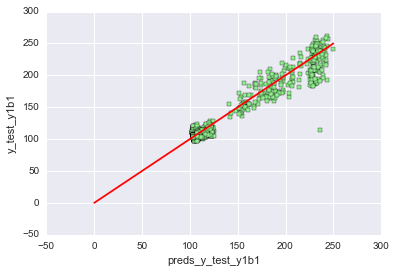

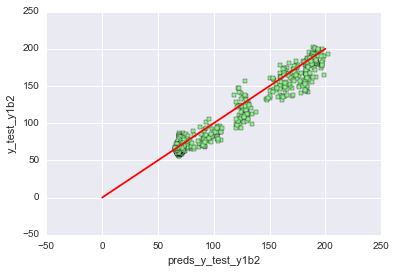

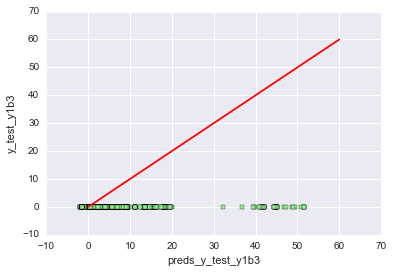

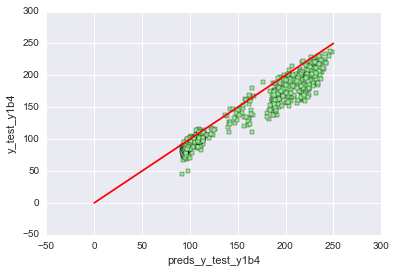

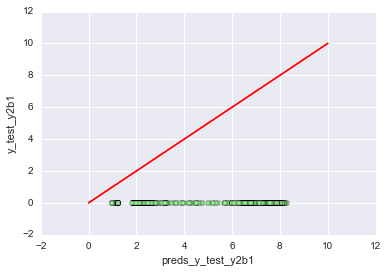

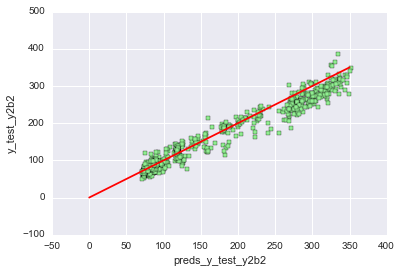

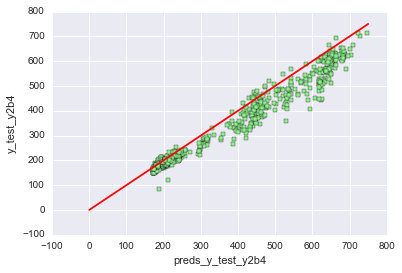

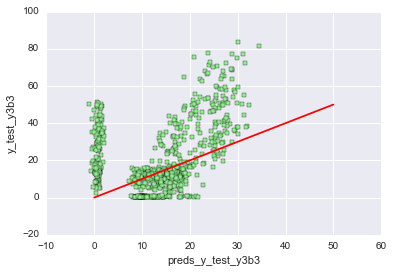

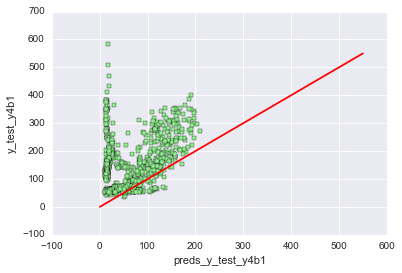

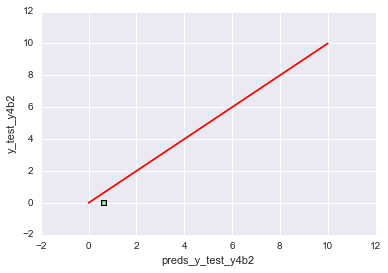

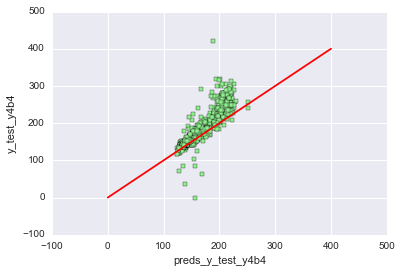

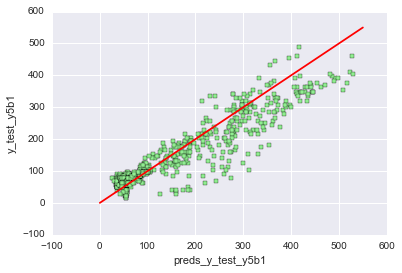

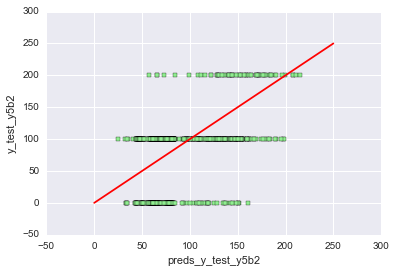

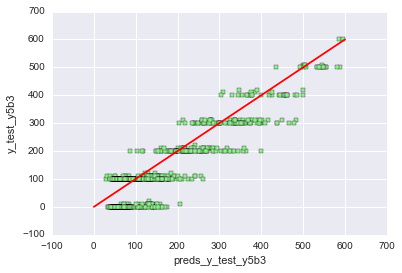

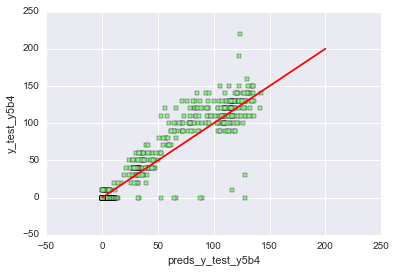

()

In [15]:
# Plot predictions
def plotPreds(preds, reals, xlbl, ylbl, dim) :
    plt.scatter(preds, reals, c = "lightgreen", marker = "s", label = "")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.plot([0, dim], [0, dim], c = "red")
    plt.show()
    return()

plotPreds(preds_y_test_y1b1, y_test_y1b1.y1, "preds_y_test_y1b1", "y_test_y1b1", 250)
plotPreds(preds_y_test_y1b2, y_test_y1b2.y1, "preds_y_test_y1b2", "y_test_y1b2", 200)
plotPreds(preds_y_test_y1b3, y_test_y1b3.y1, "preds_y_test_y1b3", "y_test_y1b3", 60)
plotPreds(preds_y_test_y1b4, y_test_y1b4.y1, "preds_y_test_y1b4", "y_test_y1b4", 250)
plotPreds(preds_y_test_y2b1, y_test_y2b1.y2, "preds_y_test_y2b1", "y_test_y2b1", 10)
plotPreds(preds_y_test_y2b2, y_test_y2b2.y2, "preds_y_test_y2b2", "y_test_y2b2", 350)
plotPreds(preds_y_test_y2b4, y_test_y2b4.y2, "preds_y_test_y2b4", "y_test_y2b4", 750)
plotPreds(preds_y_test_y3b3, y_test_y3b3.y3, "preds_y_test_y3b3", "y_test_y3b3", 50)
plotPreds(preds_y_test_y4b1, y_test_y4b1.y4, "preds_y_test_y4b1", "y_test_y4b1", 550)
plotPreds(preds_y_test_y4b2, y_test_y4b2.y4, "preds_y_test_y4b2", "y_test_y4b2", 10)
plotPreds(preds_y_test_y4b4, y_test_y4b4.y4, "preds_y_test_y4b4", "y_test_y4b4", 400)
plotPreds(preds_y_test_y5b1, y_test_y5b1.y5, "preds_y_test_y5b1", "y_test_y5b1", 550)
plotPreds(preds_y_test_y5b2, y_test_y5b2.y5, "preds_y_test_y5b2", "y_test_y5b2", 250)
plotPreds(preds_y_test_y5b3, y_test_y5b3.y5, "preds_y_test_y5b3", "y_test_y5b3", 600)
plotPreds(preds_y_test_y5b4, y_test_y5b4.y5, "preds_y_test_y5b4", "y_test_y5b4", 200)


In [9]:
# Save held-out fold predictions
y_test_name_y1 = "y_test_preds/XGB_y1_" + DATA + ".csv"
y_test_name_y2 = "y_test_preds/XGB_y2_" + DATA + ".csv"
y_test_name_y3 = "y_test_preds/XGB_y3_" + DATA + ".csv"
y_test_name_y4 = "y_test_preds/XGB_y4_" + DATA + ".csv"
y_test_name_y5 = "y_test_preds/XGB_y5_" + DATA + ".csv"

pd.DataFrame({"y1": preds_y_test1}).to_csv(y_test_name_y1, index = None, sep = ";")
pd.DataFrame({"y2": preds_y_test2}).to_csv(y_test_name_y2, index = None, sep = ";")
pd.DataFrame({"y3": preds_y_test3}).to_csv(y_test_name_y3, index = None, sep = ";")
pd.DataFrame({"y4": preds_y_test4}).to_csv(y_test_name_y4, index = None, sep = ";")
pd.DataFrame({"y5": preds_y_test5}).to_csv(y_test_name_y5, index = None, sep = ";")

In [10]:
# Now generate predictions on whole test set, to be used in ensemble for submissions
print("DATA : " + DATA)
xg_test_y1b1 = xgb.DMatrix(test_y1b1.drop(["Id"], axis = 1))
xg_test_y1b2 = xgb.DMatrix(test_y1b2.drop(["Id"], axis = 1))
xg_test_y1b3 = xgb.DMatrix(test_y1b3.drop(["Id"], axis = 1))
xg_test_y1b4 = xgb.DMatrix(test_y1b4.drop(["Id"], axis = 1))
xg_test_y2b1 = xgb.DMatrix(test_y2b1.drop(["Id"], axis = 1))
xg_test_y2b2 = xgb.DMatrix(test_y2b2.drop(["Id"], axis = 1))
xg_test_y2b4 = xgb.DMatrix(test_y2b4.drop(["Id"], axis = 1))
xg_test_y3b3 = xgb.DMatrix(test_y3b3.drop(["Id"], axis = 1))
xg_test_y4b1 = xgb.DMatrix(test_y4b1.drop(["Id"], axis = 1))
xg_test_y4b2 = xgb.DMatrix(test_y4b2.drop(["Id"], axis = 1))
xg_test_y4b4 = xgb.DMatrix(test_y4b4.drop(["Id"], axis = 1))
xg_test_y5b1 = xgb.DMatrix(test_y5b1.drop(["Id"], axis = 1))
xg_test_y5b2 = xgb.DMatrix(test_y5b2.drop(["Id"], axis = 1))
xg_test_y5b3 = xgb.DMatrix(test_y5b3.drop(["Id"], axis = 1))
xg_test_y5b4 = xgb.DMatrix(test_y5b4.drop(["Id"], axis = 1))

print("y1 : ")  
xg_val, xg = run_xgb(X_train_y1b1, y_train_y1b1.y1, X_test_y1b1, y_test_y1b1.y1, train_y1b1, y_y1b1.y1)
preds_test_y1b1 = xg.predict(xg_test_y1b1) 

xg_val, xg = run_xgb(X_train_y1b2, y_train_y1b2.y1, X_test_y1b2, y_test_y1b2.y1, train_y1b2, y_y1b2.y1)
preds_test_y1b2 = xg.predict(xg_test_y1b2)

xg_val, xg = run_xgb(X_train_y1b3, y_train_y1b3.y1, X_test_y1b3, y_test_y1b3.y1, train_y1b3, y_y1b3.y1)
preds_test_y1b3 = xg.predict(xg_test_y1b3) 

xg_val, xg = run_xgb(X_train_y1b4, y_train_y1b4.y1, X_test_y1b4, y_test_y1b4.y1, train_y1b4, y_y1b4.y1)
preds_test_y1b4 = xg.predict(xg_test_y1b4)    
print("-----")

print("y2 : ")    
xg_val, xg = run_xgb(X_train_y2b1, y_train_y2b1.y2, X_test_y2b1, y_test_y2b1.y2, train_y2b1, y_y2b1.y2)
preds_test_y2b1 = xg.predict(xg_test_y2b1) 

xg_val, xg = run_xgb(X_train_y2b2, y_train_y2b2.y2, X_test_y2b2, y_test_y2b2.y2, train_y2b2, y_y2b2.y2)
preds_test_y2b2 = xg.predict(xg_test_y2b2)

xg_val, xg = run_xgb(X_train_y2b4, y_train_y2b4.y2, X_test_y2b4, y_test_y2b4.y2, train_y2b4, y_y2b4.y2)
preds_test_y2b4 = xg.predict(xg_test_y2b4)    
print("-----")
    
print("y3 : ")    
xg_val, xg = run_xgb(X_train_y3b3, y_train_y3b3.y3, X_test_y3b3, y_test_y3b3.y3, train_y3b3, y_y3b3.y3)
preds_test_y3b3 = xg.predict(xg_test_y3b3) 
print("-----")
    
print("y4 : ")    
xg_val, xg = run_xgb(X_train_y4b1, y_train_y4b1.y4, X_test_y4b1, y_test_y4b1.y4, train_y4b1, y_y4b1.y4)
preds_test_y4b1 = xg.predict(xg_test_y4b1) 

xg_val, xg = run_xgb(X_train_y4b2, y_train_y4b2.y4, X_test_y4b2, y_test_y4b2.y4, train_y4b2, y_y4b2.y4)
preds_test_y4b2 = xg.predict(xg_test_y4b2)

xg_val, xg = run_xgb(X_train_y4b4, y_train_y4b4.y4, X_test_y4b4, y_test_y4b4.y4, train_y4b4, y_y4b4.y4)
preds_test_y4b4 = xg.predict(xg_test_y4b4)    
print("-----")
    
print("y5 : ")    
xg_val, xg = run_xgb(X_train_y5b1, y_train_y5b1.y5, X_test_y5b1, y_test_y5b1.y5, train_y5b1, y_y5b1.y5)
preds_test_y5b1 = xg.predict(xg_test_y5b1) 

xg_val, xg = run_xgb(X_train_y5b2, y_train_y5b2.y5, X_test_y5b2, y_test_y5b2.y5, train_y5b2, y_y5b2.y5)
preds_test_y5b2 = xg.predict(xg_test_y5b2)

xg_val, xg = run_xgb(X_train_y5b3, y_train_y5b3.y5, X_test_y5b3, y_test_y5b3.y5, train_y5b3, y_y5b3.y5)
preds_test_y5b3 = xg.predict(xg_test_y5b3) 

xg_val, xg = run_xgb(X_train_y5b4, y_train_y5b4.y5, X_test_y5b4, y_test_y5b4.y5, train_y5b4, y_y5b4.y5)
preds_test_y5b4 = xg.predict(xg_test_y5b4)    
print("-----")


DATA : Medians
y1 : 
XGBOOST best_iteration 3048
XGBOOST best_score 153.022812
XGBOOST best_iteration 2558
XGBOOST best_score 90.355988
XGBOOST best_iteration 5
XGBOOST best_score 0.466415
XGBOOST best_iteration 2119
XGBOOST best_score 149.119522
-----
y2 : 
XGBOOST best_iteration 0
XGBOOST best_score 0.434399
XGBOOST best_iteration 2290
XGBOOST best_score 296.330872
XGBOOST best_iteration 2167
XGBOOST best_score 944.918518
-----
y3 : 
XGBOOST best_iteration 6772
XGBOOST best_score 321.564056
-----
y4 : 
XGBOOST best_iteration 5152
XGBOOST best_score 15415.756836
XGBOOST best_iteration 639
XGBOOST best_score 0.156482
XGBOOST best_iteration 7359
XGBOOST best_score 1063.805542
-----
y5 : 
XGBOOST best_iteration 1831
XGBOOST best_score 1462.164917
XGBOOST best_iteration 1526
XGBOOST best_score 2648.506348
XGBOOST best_iteration 1860
XGBOOST best_score 3200.72998
XGBOOST best_iteration 4257
XGBOOST best_score 278.877869
-----


In [11]:
# Correct predictions for special outputs
preds_test_y2b3 = np.zeros(preds_test_y1b3.shape[0])
preds_test_y3b1 = np.zeros(preds_test_y1b1.shape[0])
preds_test_y3b2 = np.zeros(preds_test_y1b2.shape[0])
preds_test_y3b4 = np.zeros(preds_test_y1b4.shape[0])
preds_test_y4b3 = np.zeros(preds_test_y1b3.shape[0])

'''preds_test_y1b3 = np.zeros(preds_test_y1b3.shape[0])
preds_test_y2b1 = np.zeros(preds_test_y1b1.shape[0])
preds_test_y4b2 = np.zeros(preds_test_y4b2.shape[0])'''

# Concat preds in right format
preds_test1 = np.hstack((preds_test_y1b1, preds_test_y1b2, preds_test_y1b3, preds_test_y1b4))
preds_test2 = np.hstack((preds_test_y2b1, preds_test_y2b2, preds_test_y2b3, preds_test_y2b4))
preds_test3 = np.hstack((preds_test_y3b1, preds_test_y3b2, preds_test_y3b3, preds_test_y3b4))
preds_test4 = np.hstack((preds_test_y4b1, preds_test_y4b2, preds_test_y4b3, preds_test_y4b4))
preds_test5 = np.hstack((preds_test_y5b1, preds_test_y5b2, preds_test_y5b3, preds_test_y5b4))

# Correct predictions for near-zero outputs
preds_test1[preds_test1 < 2] = 0
preds_test2[preds_test2 < 2] = 0
preds_test3[preds_test3 < 2] = 0
preds_test4[preds_test4 < 2] = 0
preds_test5[preds_test5 < 2] = 0

In [12]:
# Save test set predictions
testId = pd.read_csv("clean_data/testId.csv", header = None)
test_name = "test_preds/XGB_" + DATA + ".csv"
pd.DataFrame({"Id": testId[0], "y1": preds_test1, "y2": preds_test2, "y3": preds_test3, "y4": preds_test4, "y5": preds_test5}, 
             columns = ["Id", "y1", "y2", "y3", "y4", "y5"]).to_csv(test_name, index = None, sep = ";")

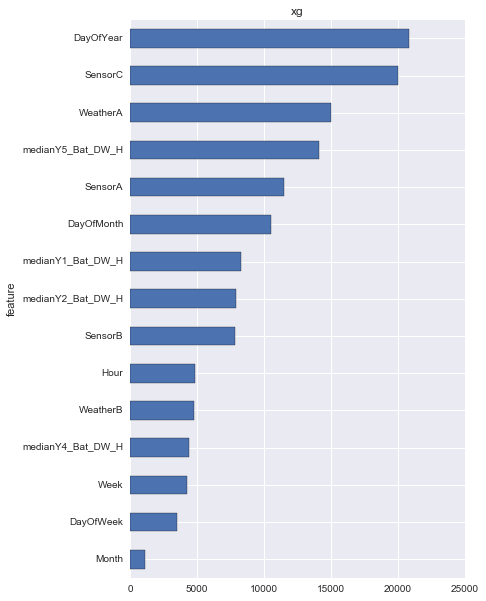

In [13]:
# Visualize most important features
importance = sorted(xg.get_fscore().items(), key = operator.itemgetter(1))
df = pd.DataFrame(importance, columns=["feature", "fscore"])
g = df.tail(50).plot(kind = "barh", x = "feature", y = "fscore", legend = False, figsize = (6, 10))
plt.title("xg")
plt.show()